# Loan prediction analysis

Predict the customers that are likely to get loans approved

## Libraries and loading data

from azureml.core import Workspace, ScriptRunConfig, Environment, Experiment
from azureml.core.runconfig import MpiConfiguration

# get workspace
ws = Workspace.from_config()

# get compute target
target = ws.compute_targets['target-name']

# get curated environment
curated_env_name = 'AzureML-PyTorch-1.6-GPU'
env = Environment.get(workspace=ws, name=curated_env_name)

# get/create experiment
exp = Experiment(ws, 'experiment_name')

# distributed job configuration
distributed_job_config = MpiConfiguration(process_count_per_node=4, node_count=2)

# set up script run configuration
config = ScriptRunConfig(
    source_directory='.',
    script='script.py',
    compute_target=target,
    environment=env,
    distributed_job_config=distributed_job_config,
)

# submit script to AML
run = exp.submit(config)
print(run.get_portal_url()) # link to ml.azure.com
run.wait_for_completion(show_output=True)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as num
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
test =  pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [5]:
test_original = test.copy()
train_original = train.copy()

## EDA

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
train.shape

(614, 13)

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
test.shape

(367, 12)

In [12]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### univariate analysis

#### Target varaible

In [13]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

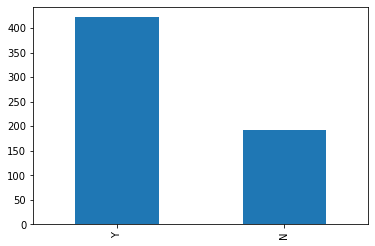

In [17]:
train.Loan_Status.value_counts().plot.bar()

~69% of the loan applications were approved and ~31% was not approved.

#### Categorical variable

features has categories

<AxesSubplot:title={'center':'Gender'}>

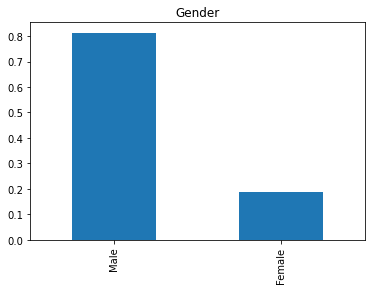

In [24]:
train.Gender.value_counts(normalize=True).plot.bar(title='Gender')

80% of the loan applicants were ale while 20% were female

<AxesSubplot:>

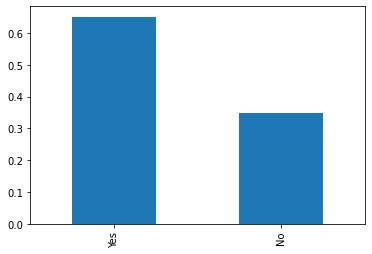

In [19]:
train.Married.value_counts(normalize=True).plot.bar(title='Married')

~65% of the applicants are married and ~ 35% are not

<AxesSubplot:title={'center':'Self Employed'}>

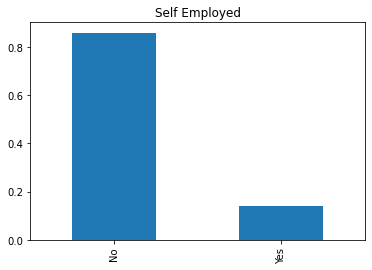

In [23]:
train.Self_Employed.value_counts(normalize=True).plot.bar(title='Self Employed')

~15% of the loan applicants are Self employed and ~85% are employed

<AxesSubplot:title={'center':'Credit History'}>

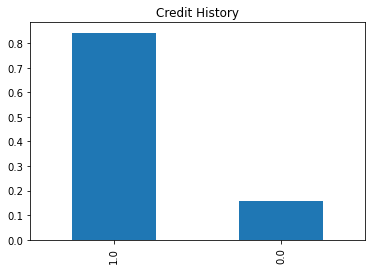

In [22]:
train.Credit_History.value_counts(normalize=True).plot.bar(title='Credit History')

~85% have repaid loan while ~15% not paid the loan

#### Ordinal variable

Variables in thr categorical features havin some order involved

<AxesSubplot:title={'center':'Dependents'}>

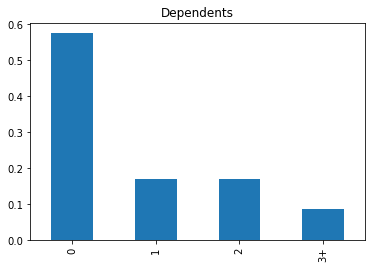

In [25]:
train.Dependents.value_counts(normalize=True).plot.bar(title='Dependents')

~ 58% of the applicants have no dependents while ~42% have more than one dependents.  

<AxesSubplot:title={'center':'Education'}>

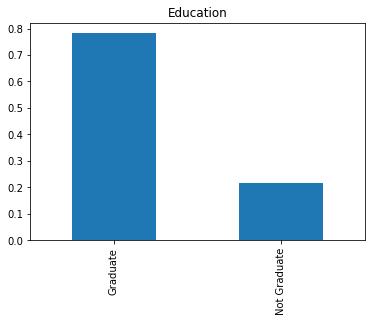

In [26]:
train.Education.value_counts(normalize=True).plot.bar(title='Education')

~75% have graduated while 25% have not graduated

<AxesSubplot:title={'center':'Property Area'}>

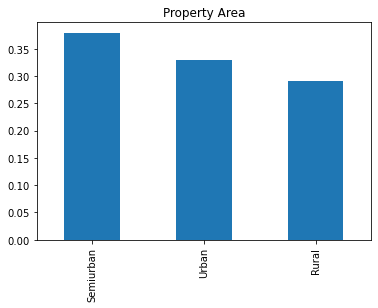

In [27]:
train.Property_Area.value_counts(normalize=True).plot.bar(title='Property Area')

most of the loan applicants are from semi urban areas

#### Numerical variable

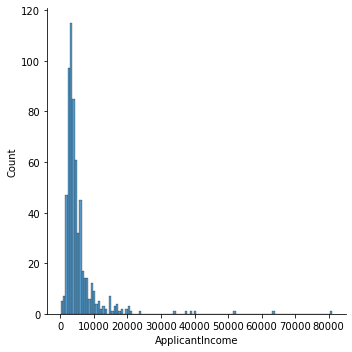

In [28]:
sns.displot(train.ApplicantIncome)

<AxesSubplot:>

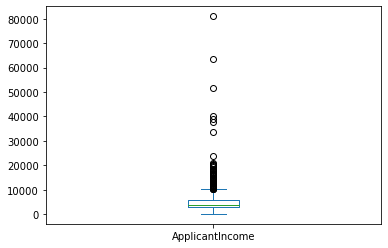

In [29]:
train.ApplicantIncome.plot.box()

income is distributed according to education and etc.

Text(0.5, 0.98, '')

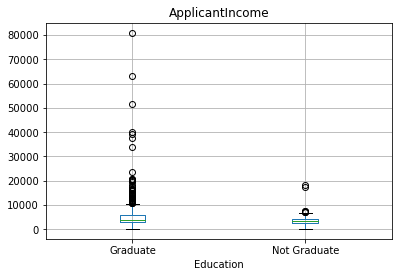

In [31]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle('')

there are many high income earners when you area a graduate which consist of most of the outliers.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

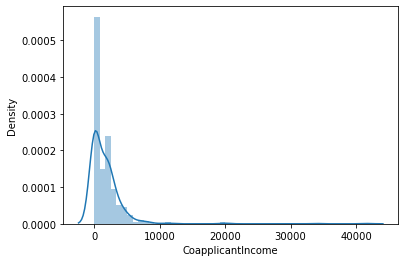

In [33]:
sns.distplot(train.CoapplicantIncome)

<AxesSubplot:>

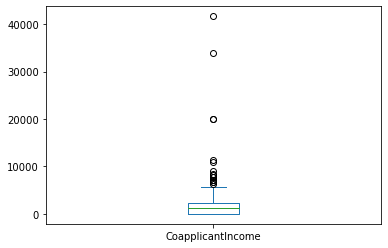

In [34]:
train.CoapplicantIncome.plot.box()

the coaplicant income is not normally distibuted.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

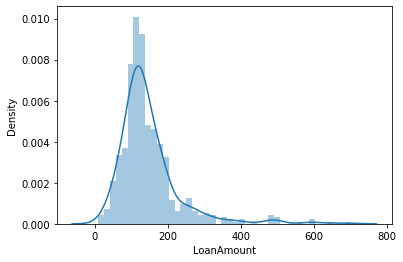

In [35]:
sns.distplot(train.LoanAmount)

<AxesSubplot:>

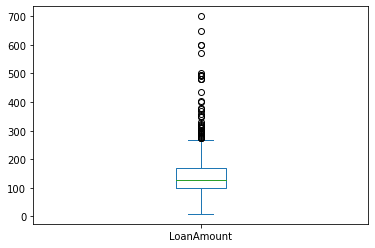

In [36]:
train.LoanAmount.plot.box()

the loan aaaaaamount is fairly normally distributed.

### Bivariate analysis